In [ ]:
 !pip install fitter

In [ ]:
!pip install distfit

In [ ]:
!pip install sklearn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions

##Data

In [ ]:
#importing data file
mumbai=pd.read_csv("/content/drive/MyDrive/Mumbai_csvfile.csv")
mumbai.head()

,City,Station,Date,FromDate,ToDate,PM2.5,PM10,NO,NO2,NH3,...,I6(SO2),I7(CO),I1(PM2.5).1,I2(PM10).1,I3(NO).1,I4(NO2).1,I5(NH3).1,I6(SO2).1,I7(CO).1,AQI
0,Mumbai-01,"BandraKurlaComplex,Mumbai-IITM",10/11/2020,10-11-202000:00,11-11-202000:00,28.85,289.36,70.61,58.47,174.30,...,3.01,0.20,1.0,1.0,1.0,1.0,1.0,1.0,1.0,239.360000
1,Mumbai-01,"BandraKurlaComplex,Mumbai-IITM",11/11/2020,11-11-202000:00,12-11-202000:00,90.91,266.66,59.70,51.01,153.50,...,3.24,0.35,1.0,1.0,1.0,1.0,1.0,1.0,1.0,216.660000
2,Mumbai-01,"BandraKurlaComplex,Mumbai-IITM",12/11/2020,12-11-202000:00,13-11-202000:00,26.19,237.63,76.37,92.88,157.16,...,8.28,1.11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,191.753333
3,Mumbai-01,"BandraKurlaComplex,Mumbai-IITM",13/11/2020,13-11-202000:00,14-11-202000:00,27.24,243.11,86.95,45.14,185.24,...,3.26,0.76,1.0,1.0,1.0,1.0,1.0,1.0,1.0,195.406667
4,Mumbai-01,"BandraKurlaComplex,Mumbai-IITM",14/11/2020,14-11-202000:00,15-11-202000:00,27.93,180.92,62.56,68.73,131.72,...,7.24,1.80,1.0,1.0,1.0,1.0,1.0,1.0,1.0,153.946667


In [ ]:
mumbai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737 entries, 0 to 12736
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         12737 non-null  object 
 1   Station      12737 non-null  object 
 2   Date         12737 non-null  object 
 3   FromDate     12737 non-null  object 
 4   ToDate       12737 non-null  object 
 5   PM2.5        12404 non-null  float64
 6   PM10         11999 non-null  float64
 7   NO           11382 non-null  float64
 8   NO2          11400 non-null  float64
 9   NH3          8923 non-null   float64
 10  SO2          11051 non-null  float64
 11  CO           11673 non-null  float64
 12  Benzene      10759 non-null  float64
 13  Ozone        9034 non-null   float64
 14  CH4          335 non-null    float64
 15  CO2          2615 non-null   float64
 16  BlackCarbon  0 non-null      float64
 17  I1(PM2.5)    1999 non-null   float64
 18  I2(PM10)     1999 non-null   float64
 19  I3(N

In [ ]:
#mumbai["Station"]=str(mumbai["Station"])
#print(type(mumbai["Station"]))


In [ ]:
#np.dtype(mumbai["Station"])

##PM2.5

In [ ]:
mumbai["PM2.5"].describe()

count    12404.000000
mean        35.348782
std         36.793970
min          0.000000
25%          8.840000
50%         22.870000
75%         54.880000
max        934.830000
Name: PM2.5, dtype: float64

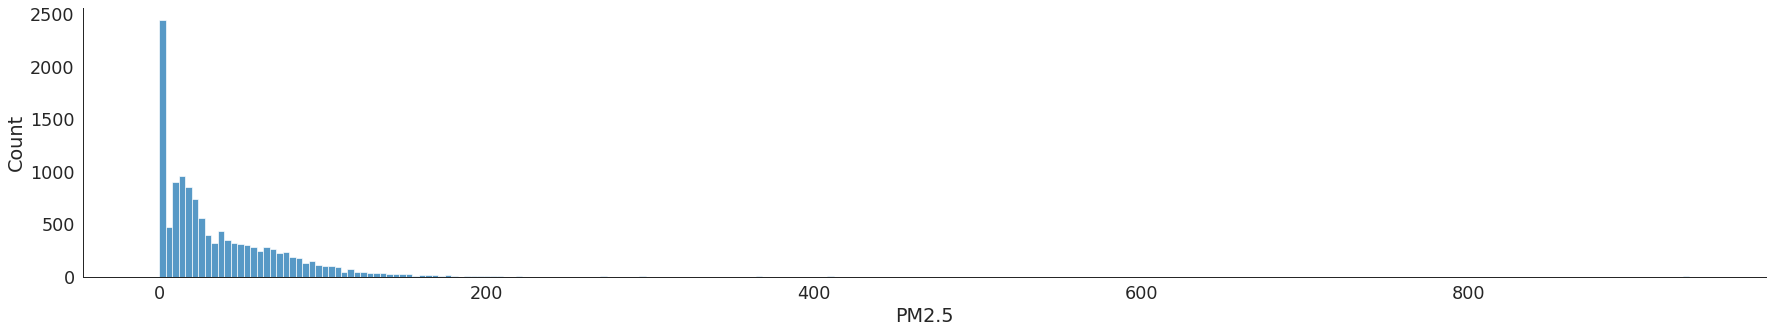

In [ ]:
sns.set_style("white")
sns.set_context("paper",font_scale=2)
sns.displot(data=mumbai, x="PM2.5", kind="hist", aspect = 5)


In [ ]:
mumbai["PM2.5"] = mumbai["PM2.5"].values
mumbai["PM2.5"]

0        28.85
1        90.91
2        26.19
3        27.24
4        27.93
         ...  
12732    76.68
12733    86.49
12734    45.57
12735      NaN
12736      NaN
Name: PM2.5, Length: 12737, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


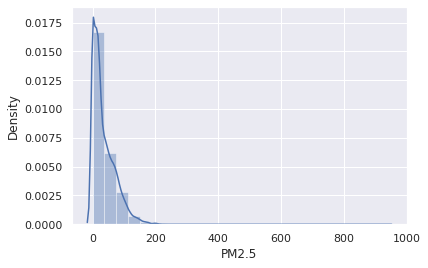

In [ ]:
import seaborn as sns; sns.set()
#import pandas as pd

X, y_ = mumbai["Date"], mumbai["PM2.5"]

#Organize Data
SR_y = pd.Series(y_, name="PM2.5")

#Plot Data
fig, ax = plt.subplots()
sns.distplot(SR_y, bins=25, color="b", ax=ax)
plt.show()

In [ ]:
pd.isnull(mumbai['PM2.5']).sum()

333

In [ ]:
mumbai['PM2.5']=mumbai['PM2.5'].fillna(mumbai["PM2.5"].median())
mumbai['PM2.5']

0        28.85
1        90.91
2        26.19
3        27.24
4        27.93
         ...  
12732    76.68
12733    86.49
12734    45.57
12735    22.87
12736    22.87
Name: PM2.5, Length: 12737, dtype: float64

#to find distribution for PM2.5

In [ ]:
from distfit import distfit

dist = distfit()

# Determine best-fitting probability distribution for data
dist.fit_transform(mumbai["PM2.5"])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0002184] [loc=35.023 scale=36.363]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0000048] [loc=0.000 scale=35.023]
[distfit] >[pareto    ] [0.53 sec] [RSS: 0.0001109] [loc=-2.072 scale=2.072]
[distfit] >[dweibull  ] [0.42 sec] [RSS: 0.0001911] [loc=31.847 scale=29.436]
[distfit] >[t         ] [0.37 sec] [RSS: 0.0001666] [loc=27.657 scale=26.187]
[distfit] >[genextreme] [0.70 sec] [RSS: 0.0000089] [loc=14.627 scale=17.983]
[distfit] >[gamma     ] [0.35 sec] [RSS: 0.0006642] [loc=-0.000 scale=3.836]
[distfit] >[lognorm   ] [0.73 sec] [RSS: 0.0005040] [loc=-0.000 scale=4.245]
[distfit] >[beta      ] [0.57 sec] [RSS: 0.0000058] [loc=-0.000 scale=3410.417]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.0006742] [loc=0.000 scale=934.830]
[distfit] >[loggamma  ] [0.57 sec] [RSS: 0.0002240] [loc=-11448.907 scale=1548.553]
[distfit] >Compute confidence interval [parametric]


{'alpha': 0.05,
 'bins': 50,
 'bound': 'both',
 'distr': 'popular',
 'f': 1.5,
 'histdata': (array([2.26044838e-02, 1.13757285e-02, 6.84475360e-03, 5.12726635e-03,
         3.58614698e-03, 1.93164826e-03, 9.19632539e-04, 5.62697535e-04,
         2.81348768e-04, 1.34375531e-04, 7.97854714e-05, 1.67969414e-05,
         0.00000000e+00, 0.00000000e+00, 4.19923534e-06, 4.19923534e-06,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.19923534e-06,
         0.00000000e+00, 4.19923534e-06, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 4.199235

In [ ]:
print(dist.summary)

         distr     score  LLE           loc        scale  \
0        expon  0.000005  NaN           0.0    35.022533   
1         beta  0.000006  NaN          -0.0  3410.416566   
2   genextreme  0.000009  NaN     14.627266    17.983321   
3       pareto  0.000111  NaN     -2.072273     2.072273   
4            t  0.000167  NaN     27.657224    26.187258   
5     dweibull  0.000191  NaN     31.846594     29.43583   
6         norm  0.000218  NaN     35.022533    36.362902   
7     loggamma  0.000224  NaN -11448.907046  1548.553138   
8      lognorm  0.000504  NaN          -0.0      4.24487   
9        gamma  0.000664  NaN          -0.0     3.836464   
10     uniform  0.000674  NaN           0.0       934.83   

                                        arg  
0                                        ()  
1   (0.7109887610548892, 77.43615462397119)  
2                   (-0.47115635198798356,)  
3                    (0.43125375219998385,)  
4                      (4.033790531263025,)  
5  

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f39b10edcd0>)

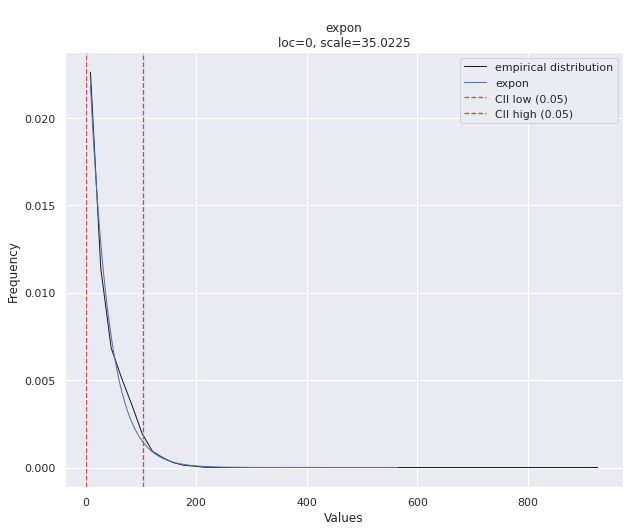

In [ ]:
dist.plot()

#distributionfor PM10

(array([5.370e+03, 3.081e+03, 1.821e+03, 1.048e+03, 4.900e+02, 1.540e+02,
        2.900e+01, 2.000e+00, 2.000e+00, 2.000e+00]),
 array([  0.   ,  54.044, 108.088, 162.132, 216.176, 270.22 , 324.264,
        378.308, 432.352, 486.396, 540.44 ]),
 <a list of 10 Patch objects>)

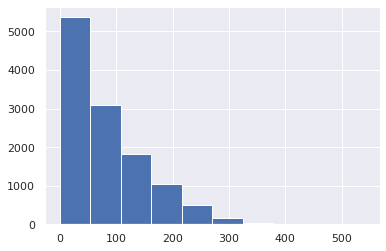

In [ ]:
plt.hist(mumbai["PM10"])

In [ ]:
pd.isnull(mumbai['PM10']).sum()

738

In [ ]:
mumbai['PM10']=mumbai['PM10'].fillna(mumbai["PM10"].median())
mumbai['PM10']

0        289.36
1        266.66
2        237.63
3        243.11
4        180.92
          ...  
12732    244.83
12733    234.80
12734    127.84
12735    183.29
12736    172.16
Name: PM10, Length: 12737, dtype: float64

In [ ]:
from distfit import distfit

dist = distfit()

# Determine best-fitting probability distribution for data
dist.fit_transform(mumbai["PM10"])

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0002598] [loc=79.077 scale=70.107]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0001239] [loc=0.000 scale=79.077]
[distfit] >[pareto    ] [0.36 sec] [RSS: 0.0003551] [loc=-2.327 scale=2.327]
[distfit] >[dweibull  ] [0.30 sec] [RSS: 0.0002547] [loc=78.778 scale=60.415]
[distfit] >[t         ] [0.25 sec] [RSS: 0.0002594] [loc=77.826 scale=66.767]
[distfit] >[genextreme] [0.74 sec] [RSS: 0.0001911] [loc=42.631 scale=46.631]
[distfit] >[gamma     ] [0.37 sec] [RSS: 0.0002663] [loc=-0.000 scale=59.004]
[distfit] >[lognorm   ] [0.74 sec] [RSS: 0.0004265] [loc=-0.000 scale=0.963]
[distfit] >[beta      ] [0.77 sec] [RSS: 0.0001771] [loc=-0.000 scale=753.580]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.0004992] [loc=0.000 scale=540.440]
[distfit] >[loggamma  ] [1.29 sec] [RSS: 0.0002603] [loc=-22835.312 scale=3060.008]
[distfit] >Compute confidence interval [parametric]


{'alpha': 0.05,
 'bins': 50,
 'bound': 'both',
 'distr': 'popular',
 'f': 1.5,
 'histdata': (array([1.74908878e-02, 3.26864597e-03, 6.11599979e-03, 5.85450811e-03,
         6.27580026e-03, 1.09681231e-02, 4.65600459e-03, 3.58824691e-03,
         3.71899275e-03, 4.80854140e-03, 3.10884550e-03, 2.96357234e-03,
         2.63670775e-03, 2.25899755e-03, 2.25899755e-03, 1.96118758e-03,
         1.83044174e-03, 1.46725886e-03, 1.21303084e-03, 1.14039426e-03,
         1.10407597e-03, 9.15220871e-04, 5.52037986e-04, 5.95619932e-04,
         3.92237516e-04, 3.63182885e-04, 2.25173389e-04, 2.61491677e-04,
         1.45273154e-04, 1.23482181e-04, 5.81092616e-05, 5.08456039e-05,
         2.17909731e-05, 4.35819462e-05, 3.63182885e-05, 0.00000000e+00,
         7.26365771e-06, 7.26365771e-06, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 7.26365771e-06, 0.00000000e+00, 7.26365771e-06,
         0.00000000e+00, 7.26365771e-06, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 7.263657

In [ ]:
print(dist.summary)

         distr     score  LLE           loc       scale  \
0        expon  0.000124  NaN           0.0   79.077252   
1         beta  0.000177  NaN          -0.0  753.580391   
2   genextreme  0.000191  NaN     42.630899   46.630738   
3     dweibull  0.000255  NaN      78.77815    60.41529   
4            t  0.000259  NaN     77.826441   66.767318   
5         norm   0.00026  NaN     79.077252    70.10723   
6     loggamma   0.00026  NaN -22835.312028  3060.00814   
7        gamma  0.000266  NaN          -0.0   59.003667   
8       pareto  0.000355  NaN     -2.327181    2.327181   
9      lognorm  0.000427  NaN          -0.0     0.96313   
10     uniform  0.000499  NaN           0.0      540.44   

                                         arg  
0                                         ()  
1   (0.8116683466591058, 11.182491393720408)  
2                     (-0.1930361854882446,)  
3                      (1.3250363303395458,)  
4                      (15.726973201681897,)  
5        

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f39b0ff3990>)

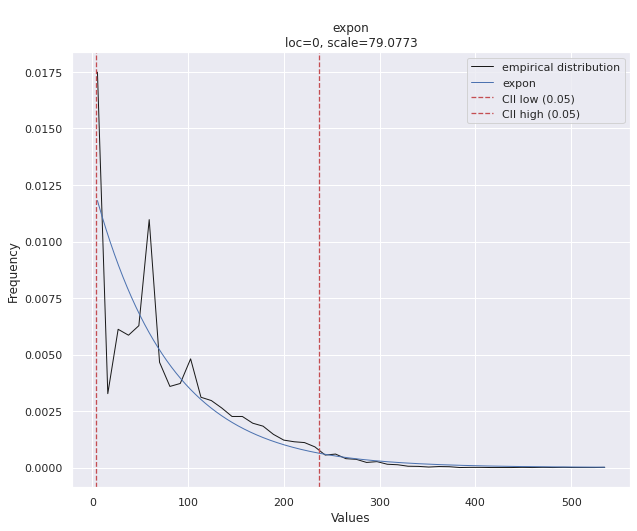

In [ ]:
dist.plot()

#dist AQI

(array([39., 61., 59., 41., 59., 85., 28., 17.,  3.,  6.]),
 array([ 11.36 ,  42.849,  74.338, 105.827, 137.316, 168.805, 200.294,
        231.783, 263.272, 294.761, 326.25 ]),
 <a list of 10 Patch objects>)

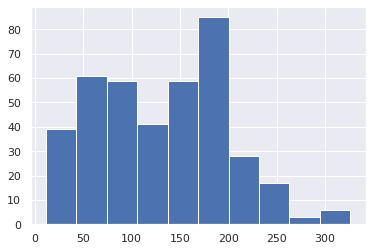

In [ ]:
plt.hist(mumbai["AQI"])

In [ ]:
pd.isnull(mumbai["AQI"]).sum()

12339

##Graphs

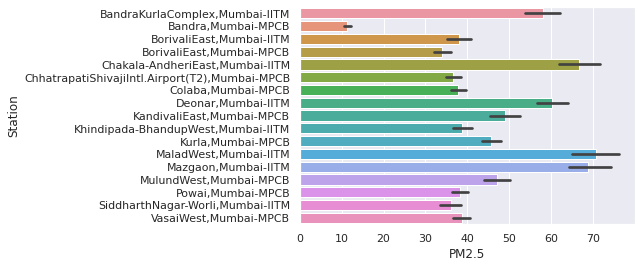

In [ ]:
sns.barplot(x = 'PM2.5',y ='Station',data=mumbai)
 
# Show the plot
plt.show()

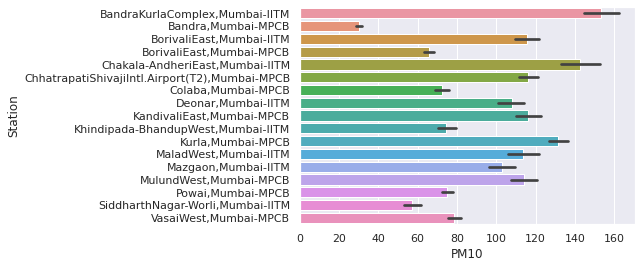

In [ ]:
sns.barplot(x = 'PM10',y ='Station',data=mumbai)
 
# Show the plot
plt.show()

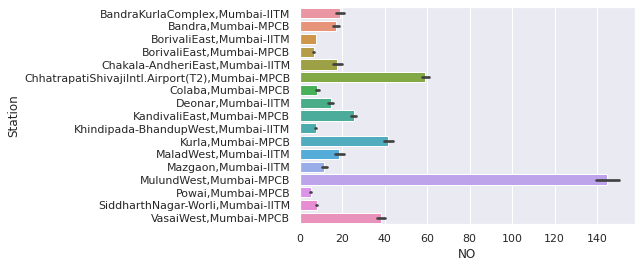

In [ ]:
sns.barplot(x = 'NO',y ='Station',data=mumbai)
 
# Show the plot
plt.show()

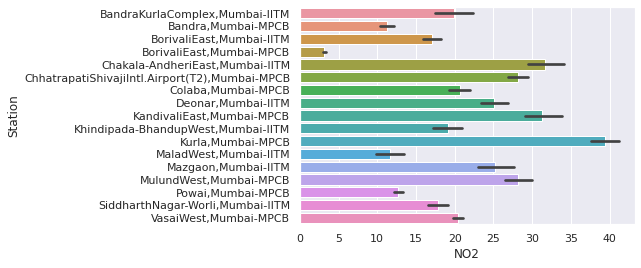

In [ ]:
sns.barplot(x = 'NO2',y ='Station',data=mumbai)
 
# Show the plot
plt.show()

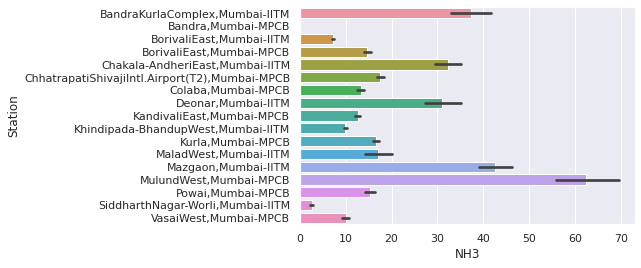

In [ ]:
sns.barplot(x = 'NH3',y ='Station',data=mumbai)
 
# Show the plot
plt.show()

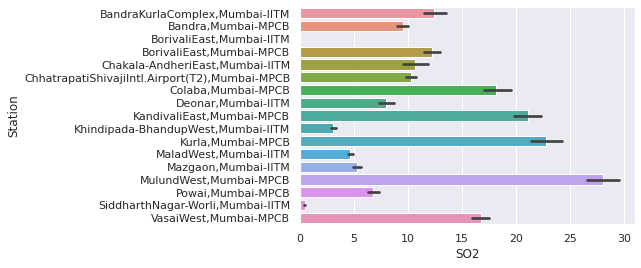

In [ ]:
sns.barplot(x = 'SO2',y ='Station',data=mumbai)
 
# Show the plot
plt.show()

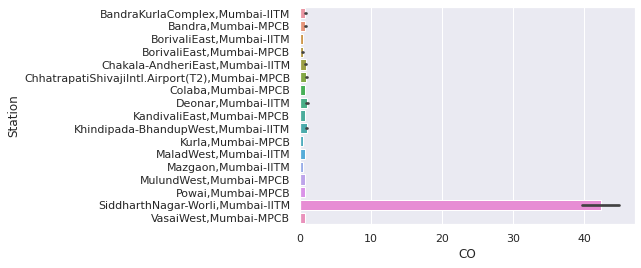

In [ ]:
sns.barplot(x = 'CO',y ='Station',data=mumbai)
 
# Show the plot
plt.show()

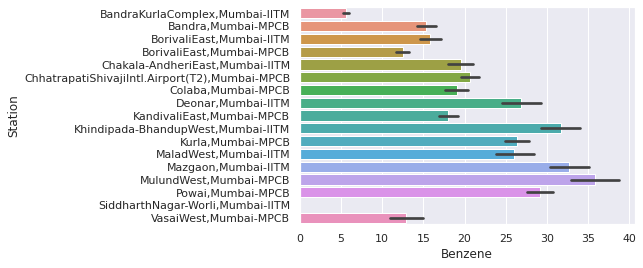

In [ ]:
sns.barplot(x = 'Benzene',y ='Station',data=mumbai)
 
# Show the plot
plt.show()

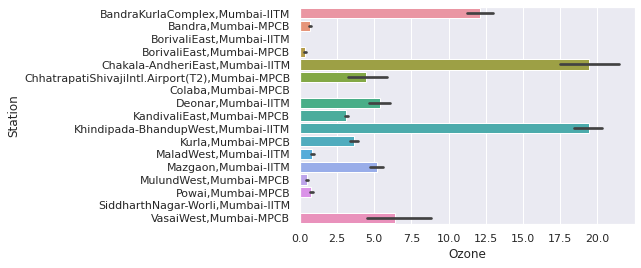

In [ ]:
sns.barplot(x = 'Ozone',y ='Station',data=mumbai)
 
# Show the plot
plt.show()

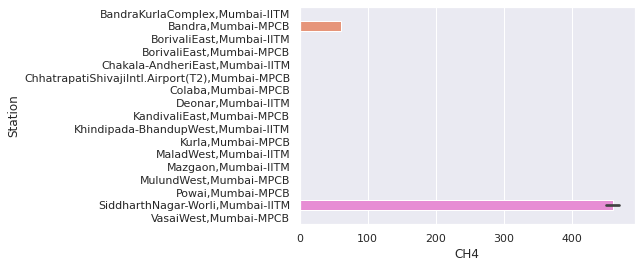

In [ ]:
sns.barplot(x = 'CH4',y ='Station',data=mumbai)
 
# Show the plot
plt.show()

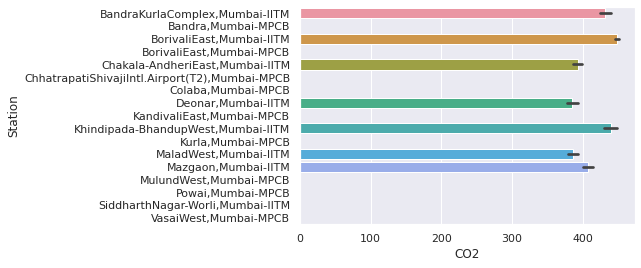

In [ ]:
sns.barplot(x = 'CO2',y ='Station',data=mumbai)
 
# Show the plot
plt.show()

In [ ]:
#plot 1:
#plt.subplot(2, 2, 1)
#sns.barplot(x = 'PM2.5',y ='Station',data=mumbai)

#plot 2:
#plt.subplot(2, 2, 2)
#sns.barplot(x = 'PM10',y ='Station',data=mumbai)
#plot3
#plt.subplot(2, 2, 3)
#sns.barplot(x = 'NO',y ='Station',data=mumbai)
#plot4
#plt.subplot(2, 2, 4)
#sns.barplot(x = 'NO2',y ='Station',data=mumbai)
#plt.show()

#Date VS Pollutant

In [ ]:
#sns.barplot(x ='Date',y = 'PM2.5',data=mumbai)
# Show the plot
#plt.show()

#MV

In [ ]:
df2=mumbai.iloc[:,5:16]
df2

,PM2.5,PM10,NO,NO2,NH3,SO2,CO,Benzene,Ozone,CH4,CO2
0,28.85,289.36,70.61,58.47,174.30,3.01,0.20,5.0,13.72,NaN,420.08
1,90.91,266.66,59.70,51.01,153.50,3.24,0.35,5.0,8.06,NaN,417.61
2,26.19,237.63,76.37,92.88,157.16,8.28,1.11,5.0,22.12,NaN,426.32
3,27.24,243.11,86.95,45.14,185.24,3.26,0.76,5.0,8.11,NaN,433.62
4,27.93,180.92,62.56,68.73,131.72,7.24,1.80,5.0,19.06,NaN,323.93
...,...,...,...,...,...,...,...,...,...,...,...
12732,76.68,244.83,9.71,34.67,8.92,20.31,1.89,NaN,NaN,NaN,NaN
12733,86.49,234.80,9.14,30.31,9.43,20.84,1.84,NaN,NaN,NaN,NaN
12734,45.57,127.84,5.26,23.24,7.95,20.63,1.56,NaN,NaN,NaN,NaN
12735,22.87,183.29,9.45,31.19,9.06,20.34,1.90,NaN,NaN,NaN,NaN


In [ ]:
df2.count()

PM2.5      12737
PM10       12737
NO         11382
NO2        11400
NH3         8923
SO2        11051
CO         11673
Benzene    10759
Ozone       9034
CH4          335
CO2         2615
dtype: int64

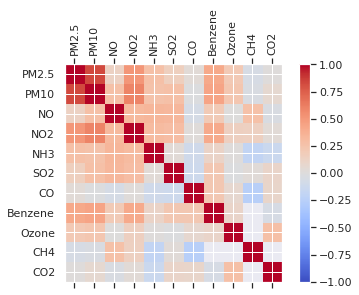

In [ ]:
corr = df2.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df2.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df2.columns)
ax.set_yticklabels(df2.columns)
plt.show()

In [ ]:
df2.corr()

,PM2.5,PM10,NO,NO2,NH3,SO2,CO,Benzene,Ozone,CH4,CO2
PM2.5,1.000000,0.828960,0.137190,0.510700,0.274632,0.156922,0.037581,0.417568,0.209379,-0.050022,0.014723
PM10,0.828960,1.000000,0.275947,0.598923,0.265492,0.275562,-0.013671,0.444246,0.231755,-0.034370,0.064813
NO,0.137190,0.275947,1.000000,0.321411,0.343419,0.333456,-0.058812,0.201314,0.004533,0.268846,-0.034549
NO2,0.510700,0.598923,0.321411,1.000000,0.311397,0.293176,0.016879,0.408955,0.153234,0.143070,0.032749
NH3,0.274632,0.265492,0.343419,0.311397,1.000000,0.032789,-0.101164,0.113402,0.012720,-0.181345,-0.128427
SO2,0.156922,0.275562,0.333456,0.293176,0.032789,1.000000,-0.110208,0.222018,-0.011586,0.027527,0.103058
CO,0.037581,-0.013671,-0.058812,0.016879,-0.101164,-0.110208,1.000000,0.219985,0.071911,-0.248671,0.097489
Benzene,0.417568,0.444246,0.201314,0.408955,0.113402,0.222018,0.219985,1.000000,0.105307,NaN,-0.051781
Ozone,0.209379,0.231755,0.004533,0.153234,0.012720,-0.011586,0.071911,0.105307,1.000000,NaN,0.279781
CH4,-0.050022,-0.034370,0.268846,0.143070,-0.181345,0.027527,-0.248671,NaN,NaN,1.000000,NaN


In [ ]:
pd.isnull(df2).sum()

PM2.5       0
PM10        0
NO       1355
NO2      1337
NH3      3814
SO2      1686
CO       1064
dtype: int64

In [ ]:
from pydoc import help # can type in the python console `help(name of function)` to get the documentation
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats


In [ ]:
from IPython.display import display, HTML
# figures inline in notebook
%matplotlib inline
np.set_printoptions(suppress=True)
DISPLAY_MAX_ROWS = 20 # number of max rows to print for a DataFrame
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

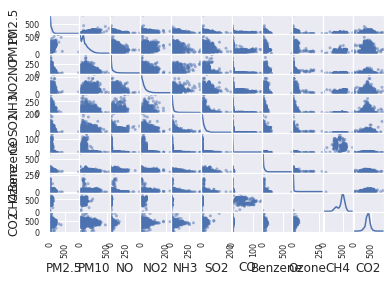

In [ ]:
pd.plotting.scatter_matrix(df2, hist_kwds={'bins':30},diagonal='kde')
plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(df2,size=5)

In [ ]:
df3=mumbai.groupby(mumbai['Station'])
df3.describe()

PM2.5                        \
                                                 count       mean        std   
Station                                                                        
Bandra,Mumbai-MPCB                              3620.0  11.247287  24.944824   
BandraKurlaComplex,Mumbai-IITM                   401.0  57.949027  45.619910   
BorivaliEast,Mumbai-IITM                         414.0  37.987585  29.381048   
BorivaliEast,Mumbai-MPCB                         891.0  33.897295  30.055263   
Chakala-AndheriEast,Mumbai-IITM                  361.0  66.713823  46.414754   
ChhatrapatiShivajiIntl.Airport(T2),Mumbai-MPCB   927.0  36.643128  27.768773   
Colaba,Mumbai-MPCB                               895.0  37.847520  28.767998   
Deonar,Mumbai-IITM                               405.0  60.203037  39.831908   
KandivaliEast,Mumbai-MPCB                        373.0  48.982118  36.153363   
Khindipada-BhandupWest,Mumbai-IITM               363.0  38.808402  24.270057   
Kurla,Mumbai-MPCB                                916.0  45.628712  35.873469   
MaladWest,Mumbai-IITM                            283.0  70.816325  50.911904   
Mazgaon,Mumbai-IITM                              413.0  68.793075  51.866657   
MulundWest,Mumbai-MPCB                           356.0  47.085702  29.820035   
Powai,Mumbai-MPCB                                933.0  38.142079  28.846695   
SiddharthNagar-Worli,Mumbai-IITM                 339.0  36.014808  24.316948   
VasaiWest,Mumbai-MPCB                            847.0  38.639847  29.603958   

                                                                       \
                                                 min      25%     50%   
Station                                                                 
Bandra,Mumbai-MPCB                              0.00   0.0000   0.000   
BandraKurlaComplex,Mumbai-IITM                  1.62  24.3600  38.730   
BorivaliEast,Mumbai-IITM                        2.14  15.2275  30.190   
BorivaliEast,Mumbai-MPCB                        1.36  10.6400  22.870   
Chakala-AndheriEast,Mumbai-IITM                 5.28  25.4400  58.320   
ChhatrapatiShivajiIntl.Airport(T2),Mumbai-MPCB  4.29  15.3850  24.330   
Colaba,Mumbai-MPCB                              2.87  14.6300  26.510   
Deonar,Mumbai-IITM                              2.99  21.5200  57.590   
KandivaliEast,Mumbai-MPCB                       7.14  18.7600  34.950   
Khindipada-BhandupWest,Mumbai-IITM              1.17  18.7100  35.630   
Kurla,Mumbai-MPCB                               0.79  17.8300  28.290   
MaladWest,Mumbai-IITM                           1.06  24.3500  60.290   
Mazgaon,Mumbai-IITM                             4.10  22.8700  58.320   
MulundWest,Mumbai-MPCB                          5.49  21.9950  38.115   
Powai,Mumbai-MPCB                               0.07  15.3000  26.190   
SiddharthNagar-Worli,Mumbai-IITM                3.66  15.6800  28.170   
VasaiWest,Mumbai-MPCB                           0.79  12.9550  27.200   

                                                                   PM10  \
                                                    75%     max   count   
Station                                                                   
Bandra,Mumbai-MPCB                               16.885  934.83  3620.0   
BandraKurlaComplex,Mumbai-IITM                   76.360  208.81   401.0   
BorivaliEast,Mumbai-IITM                         52.140  154.19   414.0   
BorivaliEast,Mumbai-MPCB                         53.540  199.68   891.0   
Chakala-AndheriEast,Mumbai-IITM                  98.080  368.03   361.0   
ChhatrapatiShivajiIntl.Airport(T2),Mumbai-MPCB   53.075  155.28   927.0   
Colaba,Mumbai-MPCB                               54.870  271.56   895.0   
Deonar,Mumbai-IITM                               92.760  153.74   405.0   
KandivaliEast,Mumbai-MPCB                        73.930  176.34   373.0   
Khindipada-BhandupWest,Mumbai-IITM               56.625  206.24   363.0   
Kurla,Mumbai

In [ ]:
df4=pd.DataFrame(mumbai.iloc[:,[1,5,6,7,8,9,10,11,12]])
df4

,Station,PM2.5,PM10,NO,NO2,NH3,SO2,CO,Benzene
0,"BandraKurlaComplex,Mumbai-IITM",28.85,289.36,70.61,58.47,174.30,3.01,0.20,5.0
1,"BandraKurlaComplex,Mumbai-IITM",90.91,266.66,59.70,51.01,153.50,3.24,0.35,5.0
2,"BandraKurlaComplex,Mumbai-IITM",26.19,237.63,76.37,92.88,157.16,8.28,1.11,5.0
3,"BandraKurlaComplex,Mumbai-IITM",27.24,243.11,86.95,45.14,185.24,3.26,0.76,5.0
4,"BandraKurlaComplex,Mumbai-IITM",27.93,180.92,62.56,68.73,131.72,7.24,1.80,5.0
...,...,...,...,...,...,...,...,...,...
12732,"VasaiWest,Mumbai-MPCB",76.68,244.83,9.71,34.67,8.92,20.31,1.89,NaN
12733,"VasaiWest,Mumbai-MPCB",86.49,234.80,9.14,30.31,9.43,20.84,1.84,NaN
12734,"VasaiWest,Mumbai-MPCB",45.57,127.84,5.26,23.24,7.95,20.63,1.56,NaN
12735,"VasaiWest,Mumbai-MPCB",22.87,183.29,9.45,31.19,9.06,20.34,1.90,NaN


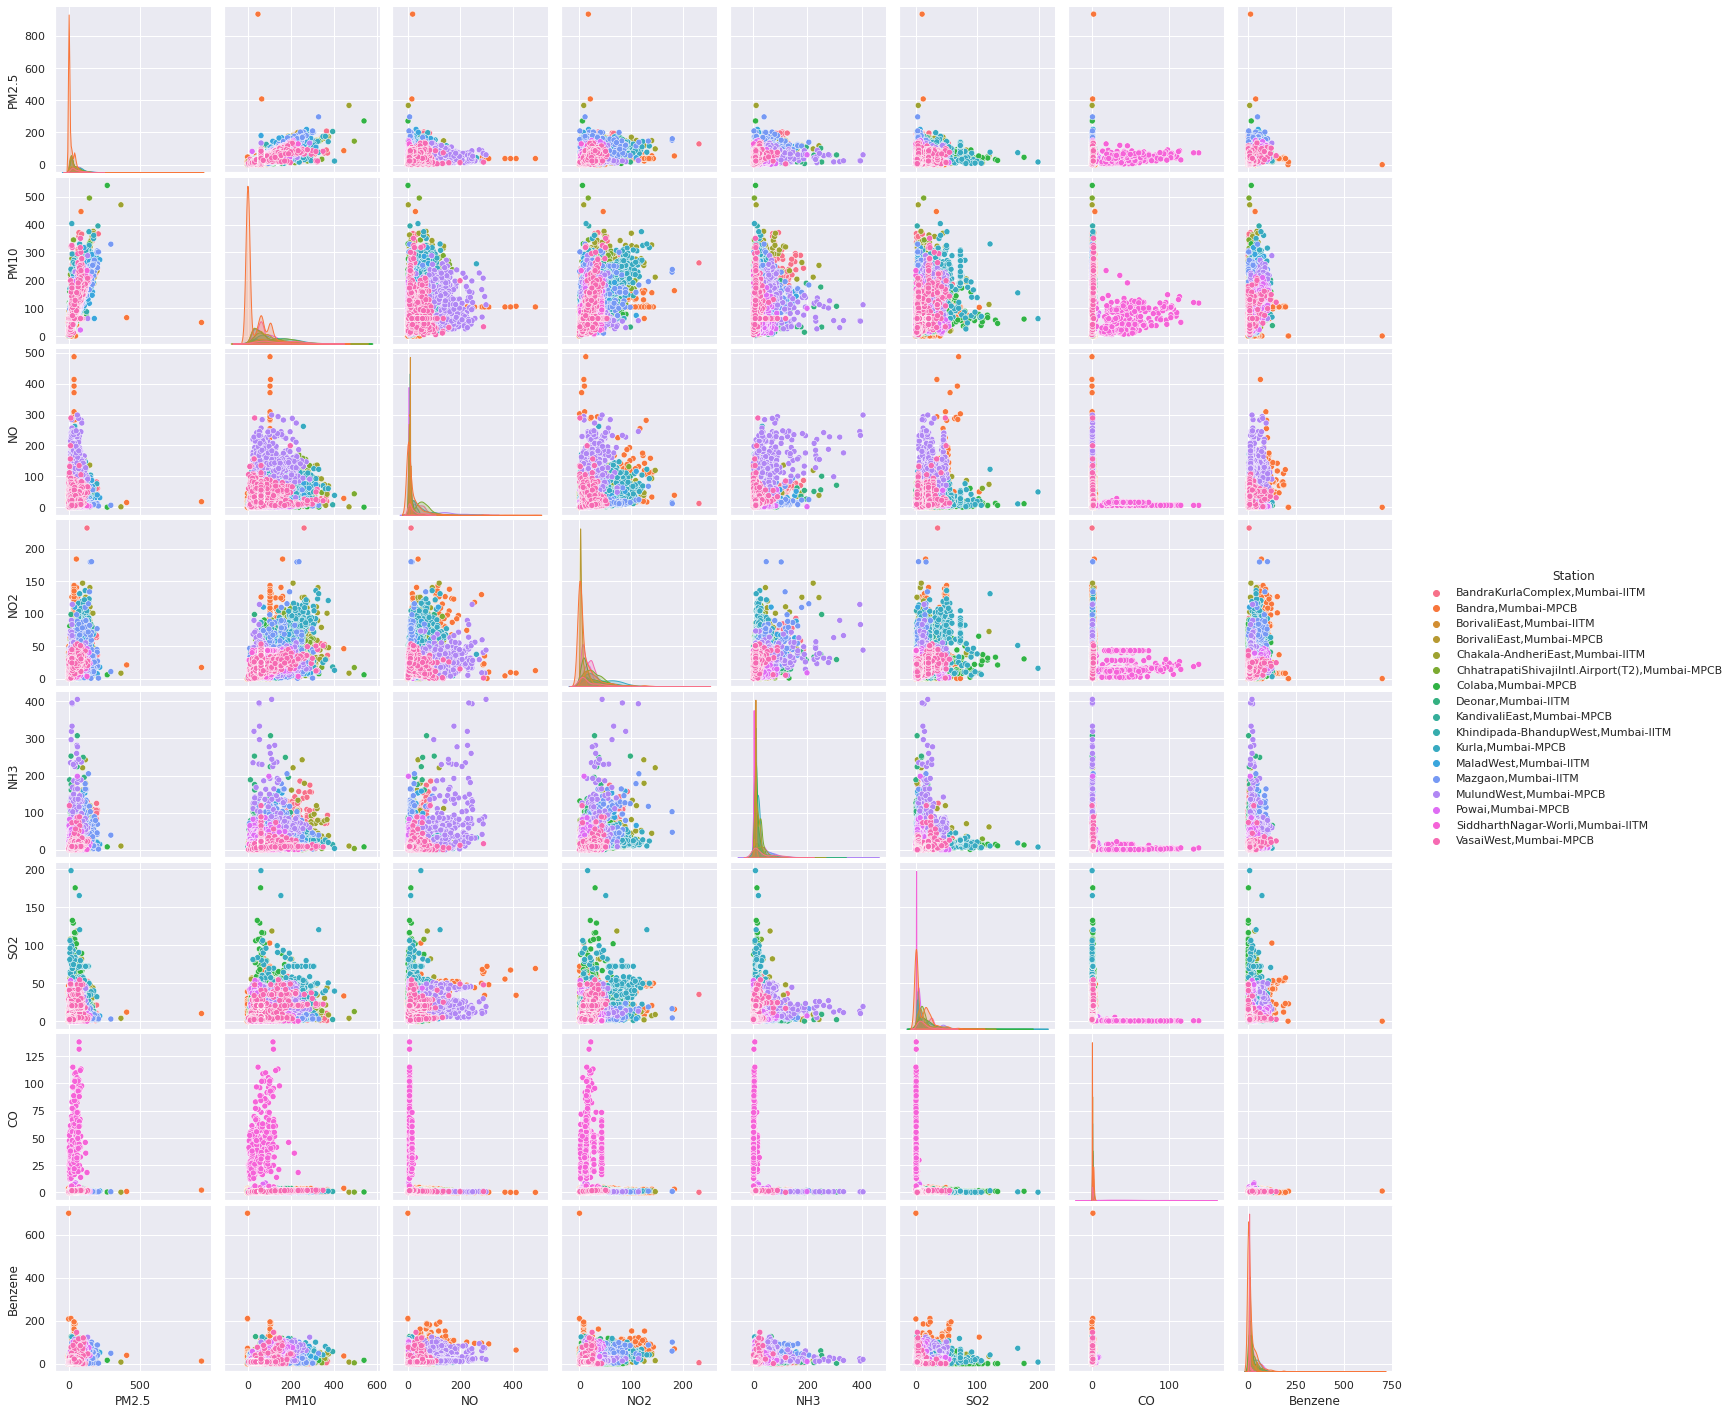

In [ ]:
sns.pairplot(df4,hue='Station',size=2.5)

In [ ]:
df5=pd.DataFrame(mumbai.iloc[:,[1,5]])
df5

,Station,PM2.5
0,"BandraKurlaComplex,Mumbai-IITM",28.85
1,"BandraKurlaComplex,Mumbai-IITM",90.91
2,"BandraKurlaComplex,Mumbai-IITM",26.19
3,"BandraKurlaComplex,Mumbai-IITM",27.24
4,"BandraKurlaComplex,Mumbai-IITM",27.93
...,...,...
12732,"VasaiWest,Mumbai-MPCB",76.68
12733,"VasaiWest,Mumbai-MPCB",86.49
12734,"VasaiWest,Mumbai-MPCB",45.57
12735,"VasaiWest,Mumbai-MPCB",22.87


In [ ]:
dfs=df5.groupby(df5["Station"])
dfs.describe()

PM2.5                        \
                                                 count       mean        std   
Station                                                                        
Bandra,Mumbai-MPCB                              3620.0  11.247287  24.944824   
BandraKurlaComplex,Mumbai-IITM                   401.0  57.949027  45.619910   
BorivaliEast,Mumbai-IITM                         414.0  37.987585  29.381048   
BorivaliEast,Mumbai-MPCB                         891.0  33.897295  30.055263   
Chakala-AndheriEast,Mumbai-IITM                  361.0  66.713823  46.414754   
ChhatrapatiShivajiIntl.Airport(T2),Mumbai-MPCB   927.0  36.643128  27.768773   
Colaba,Mumbai-MPCB                               895.0  37.847520  28.767998   
Deonar,Mumbai-IITM                               405.0  60.203037  39.831908   
KandivaliEast,Mumbai-MPCB                        373.0  48.982118  36.153363   
Khindipada-BhandupWest,Mumbai-IITM               363.0  38.808402  24.270057   
Kurla,Mumbai-MPCB                                916.0  45.628712  35.873469   
MaladWest,Mumbai-IITM                            283.0  70.816325  50.911904   
Mazgaon,Mumbai-IITM                              413.0  68.793075  51.866657   
MulundWest,Mumbai-MPCB                           356.0  47.085702  29.820035   
Powai,Mumbai-MPCB                                933.0  38.142079  28.846695   
SiddharthNagar-Worli,Mumbai-IITM                 339.0  36.014808  24.316948   
VasaiWest,Mumbai-MPCB                            847.0  38.639847  29.603958   

                                                                       \
                                                 min      25%     50%   
Station                                                                 
Bandra,Mumbai-MPCB                              0.00   0.0000   0.000   
BandraKurlaComplex,Mumbai-IITM                  1.62  24.3600  38.730   
BorivaliEast,Mumbai-IITM                        2.14  15.2275  30.190   
BorivaliEast,Mumbai-MPCB                        1.36  10.6400  22.870   
Chakala-AndheriEast,Mumbai-IITM                 5.28  25.4400  58.320   
ChhatrapatiShivajiIntl.Airport(T2),Mumbai-MPCB  4.29  15.3850  24.330   
Colaba,Mumbai-MPCB                              2.87  14.6300  26.510   
Deonar,Mumbai-IITM                              2.99  21.5200  57.590   
KandivaliEast,Mumbai-MPCB                       7.14  18.7600  34.950   
Khindipada-BhandupWest,Mumbai-IITM              1.17  18.7100  35.630   
Kurla,Mumbai-MPCB                               0.79  17.8300  28.290   
MaladWest,Mumbai-IITM                           1.06  24.3500  60.290   
Mazgaon,Mumbai-IITM                             4.10  22.8700  58.320   
MulundWest,Mumbai-MPCB                          5.49  21.9950  38.115   
Powai,Mumbai-MPCB                               0.07  15.3000  26.190   
SiddharthNagar-Worli,Mumbai-IITM                3.66  15.6800  28.170   
VasaiWest,Mumbai-MPCB                           0.79  12.9550  27.200   

                                                                 
                                                    75%     max  
Station                                                          
Bandra,Mumbai-MPCB                               16.885  934.83  
BandraKurlaComplex,Mumbai-IITM                   76.360  208.81  
BorivaliEast,Mumbai-IITM                         52.140  154.19  
BorivaliEast,Mumbai-MPCB                         53.540  199.68  
Chakala-AndheriEast,Mumbai-IITM                  98.080  368.03  
ChhatrapatiShivajiIntl.Airport(T2),Mumbai-MPCB   53.075  155.28  
Colaba,Mumbai-MPCB                               54.870  271.56  
Deonar,Mumbai-IITM                               92.760  153.74  
KandivaliEast,Mumbai-MPCB                        73.930  176.34  
Khindipada-BhandupWest,Mumbai-IITM               56.625  206.24  
Kurla,Mumbai-MPCB                                74.640  198.70  
MaladWest,Mumbai-IITM                           107.670  219.20

##Time series

#for PM2.5

In [ ]:
dfp=mumbai.iloc[:,[2,5]]
dfp.head()

,Date,PM2.5
0,10/11/2020,28.85
1,11/11/2020,90.91
2,12/11/2020,26.19
3,13/11/2020,27.24
4,14/11/2020,27.93


In [ ]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737 entries, 0 to 12736
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    12737 non-null  object 
 1   PM2.5   12737 non-null  float64
dtypes: float64(1), object(1)
memory usage: 199.1+ KB


In [ ]:
dfp["PM2.5"].describe()

count    12737.000000
mean        35.022533
std         36.364330
min          0.000000
25%          9.180000
50%         22.870000
75%         53.810000
max        934.830000
Name: PM2.5, dtype: float64